# **Made By Anshu Pandey**
# **Roll Number: 18csu026**

# **Installation of important library** 
1. PANDAS - PROFILING
2. mlxtend==0.17.3


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=6a377b5016b30de360580941761a31712286d50a0b1bdebbe913e7e6fc2dd42e
  Stored in directory: /tmp/pip-ephem-wheel-cache-1x62ijvt/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
!pip install apyori

In [ ]:
!pip install mlxtend==0.17.3

     |████████████████████████████████| 1.3MB 2.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# **Transactions from a bakery**

**Objectives:** To compare time taken by Aprior, FP Growth, Max pattern, Close Pattern mining Algorithms to compute association rules for Bakery Dataset. And discuss the advantages and disadvantages for the algorithms above and recommend association rules for business profit and at last forecasted the future sales.

**Data set description:**The dataset consists of 21293 observations from a bakery. The data file contains four variables, Date, Time, Transaction ID and Item. Transaction ID ranges from 1 through 9684.This dataset is taken from Kaggle. This data is time-series dataset. Time series data is data that is collected at different points in time.

**Objective Behind the dataset taken:** Objective to take bakery dataset is as it is time-series and transactional and this type of dataset is best suited for association rule mining and this extraction of rule mining can be helpful if you are going to open a bakery so you can apply discount on the items and the time period to increase the sale. 

**In this project we are going to compare Aprior, and FPGrowth ,Max-Pattern ,Close-Pattern time taken to solve the query**


Required Library:
1.	pandas-profiling
2.	mlxtend==0.17.3
3.	pandas
4.	NumPy 
5.	seaborn 
6.	datetime
7.	matplotlib



### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport


### **Load dataset**

1.	Load the dataset using pandas 

In [ ]:
df = pd.read_csv('BreadBasket.csv')

df.head()


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


After loading data use Pandas-Profiling to perform EDA. Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.

In [ ]:
#Please check  profile-report for EDA
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file('EDA.html')

*So in EDA using Pandas Profelling there is no null values but there is dupicate rows*
 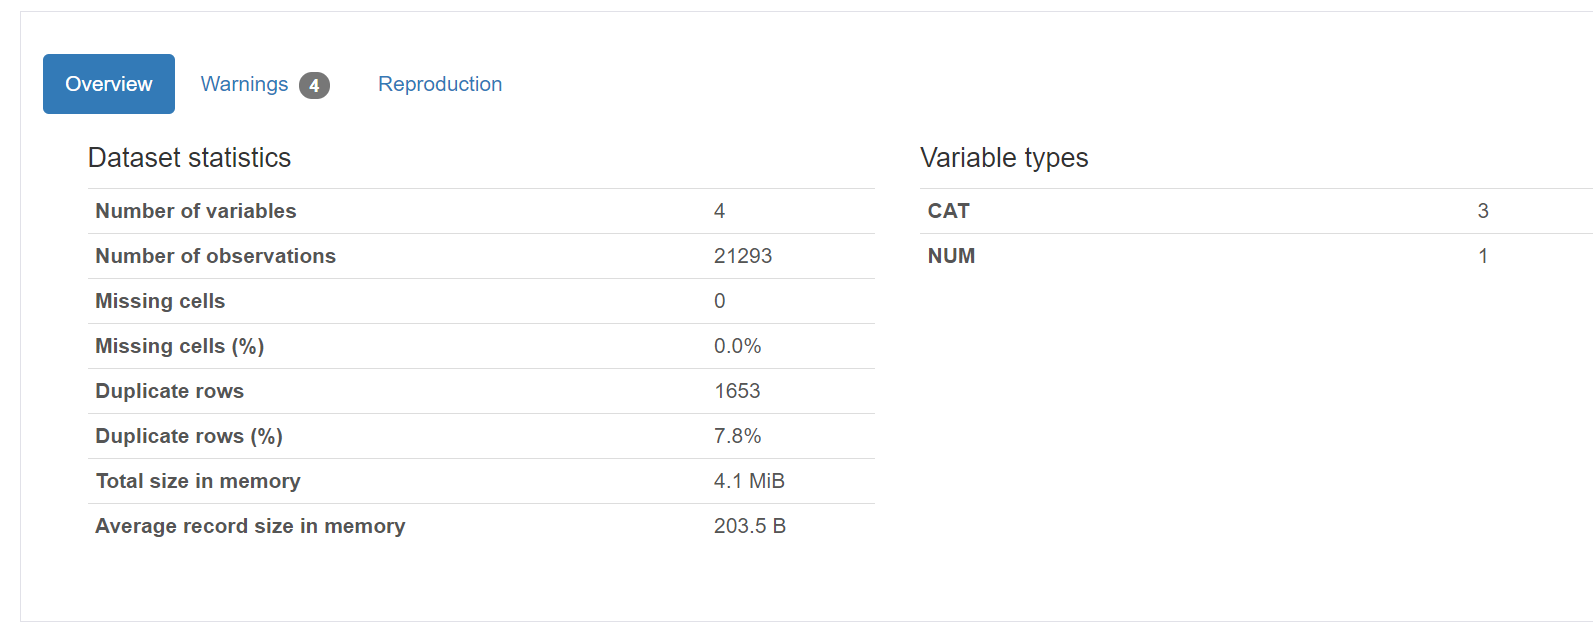

### **Data Cleaning**
Droping null and duplicate values .we are converting the string to Lowercase and removing null values if any and removing duplicate values.

In [ ]:
df['Item'] = df['Item'].str.lower()
df = df.drop(df[df.Item == 'none'].index)
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

### Data Visulization

In [ ]:
print("Number of unique items sold in barkery: ",len(df['Item'].unique()))

Number of unique items sold in barkery:  94


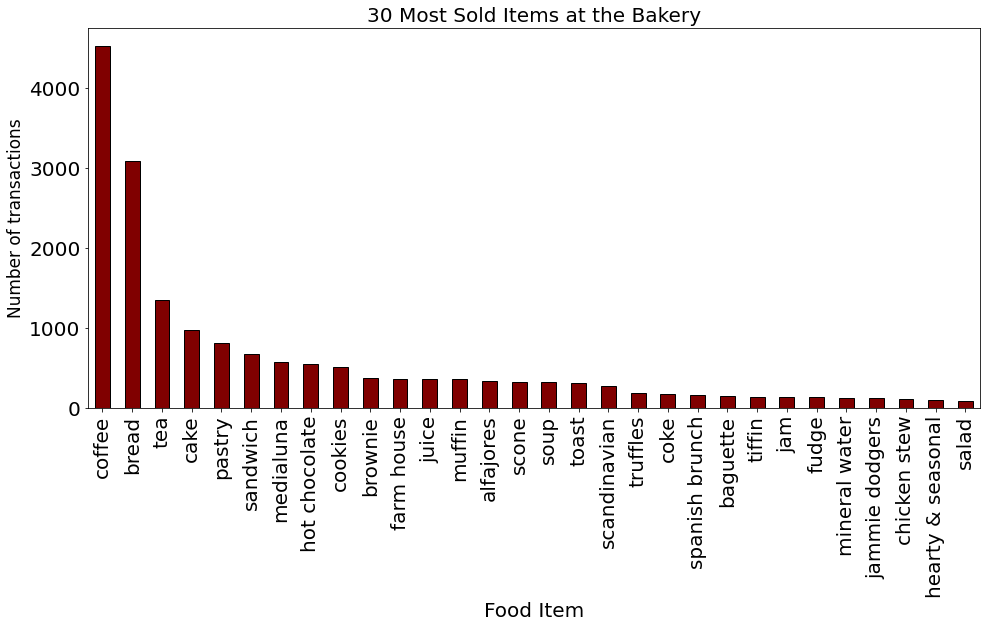

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='maroon',edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('30 Most Sold Items at the Bakery',fontsize=20)
plt.show()


This is the 30 most sold item in this bakery.Top most 30 sale of items in bakery. We can see that coffee, bread, tea was top three sale all-over. For many consumers, coffee is an essential part of their morning. For café owners, there’s a different type of morning rush. From the hours of roughly 6 to 10 AM, it can seem tough to keep up with the constant flow of customers flocking to your shop for coffee

Now, as it is transactional data, we need to convert the date, time string to datetime using datetime library.

In [ ]:

df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours','Item']]

Now, inserting the column on the bases of the hours like Morning, Afternoon, Evening so that we can analysis sale at that time

In [ ]:
def time_of_day(hour):
    """
    Determines whether a purchase was made in the morning, afternoon, or evening.
    """
    if hour < 12:
        return 'morning'
    elif hour < 17:
        return 'afternoon'
    else:
        return 'evening'

In [ ]:
df1['time_of_day'] = df1.Hours.apply(time_of_day)

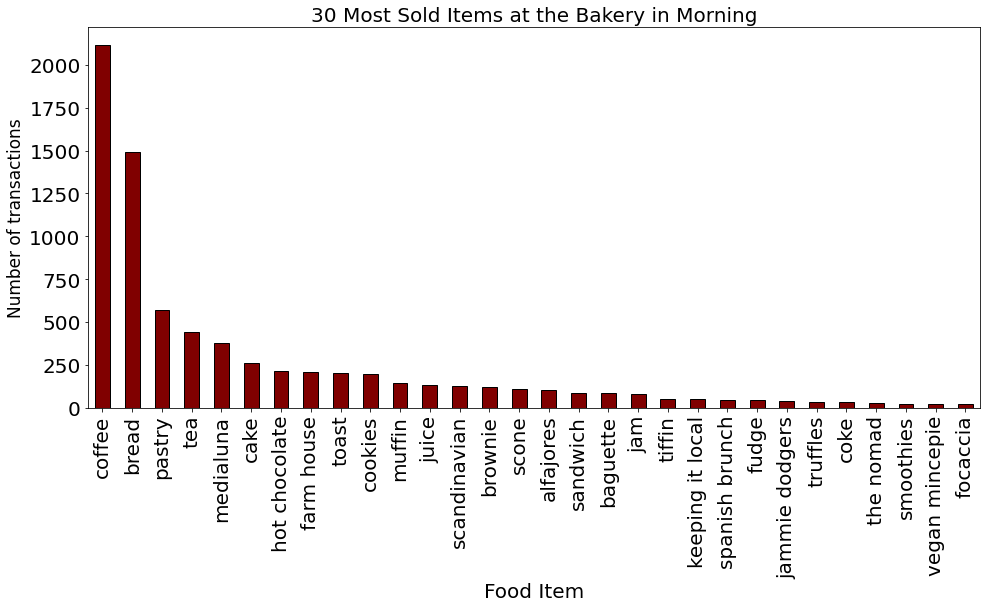

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
at=df1[df1['time_of_day']=='morning']
at['Item'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='maroon',edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('30 Most Sold Items at the Bakery in Morning',fontsize=20)
plt.show()

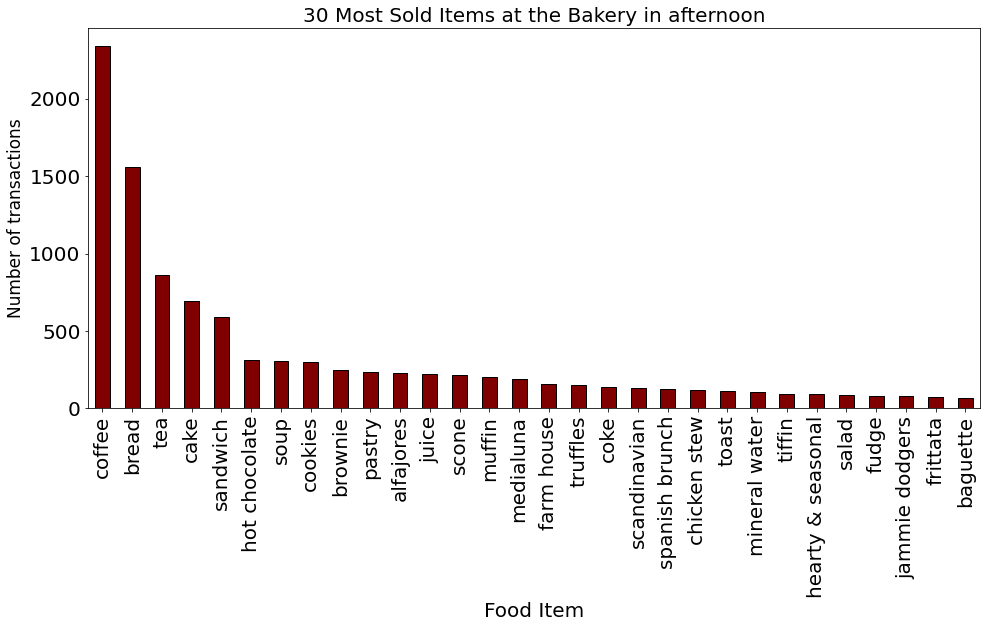

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
at=df1[df1['time_of_day']=='afternoon']
at['Item'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='maroon',edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('30 Most Sold Items at the Bakery in afternoon',fontsize=20)
plt.show()

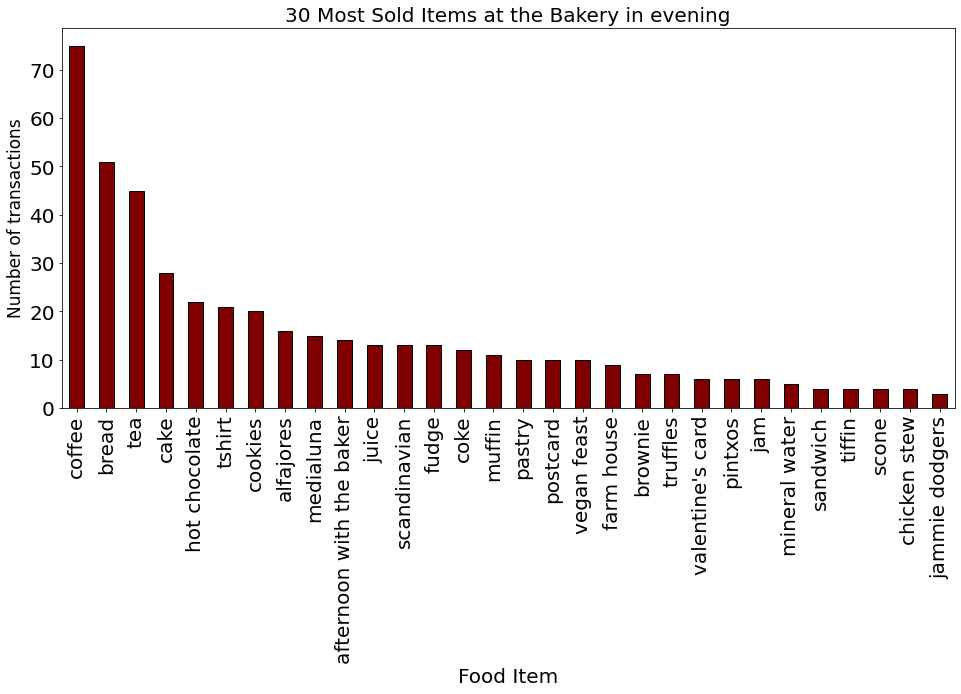

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
at=df1[df1['time_of_day']=='evening']
at['Item'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='maroon',edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('30 Most Sold Items at the Bakery in evening',fontsize=20)
plt.show()

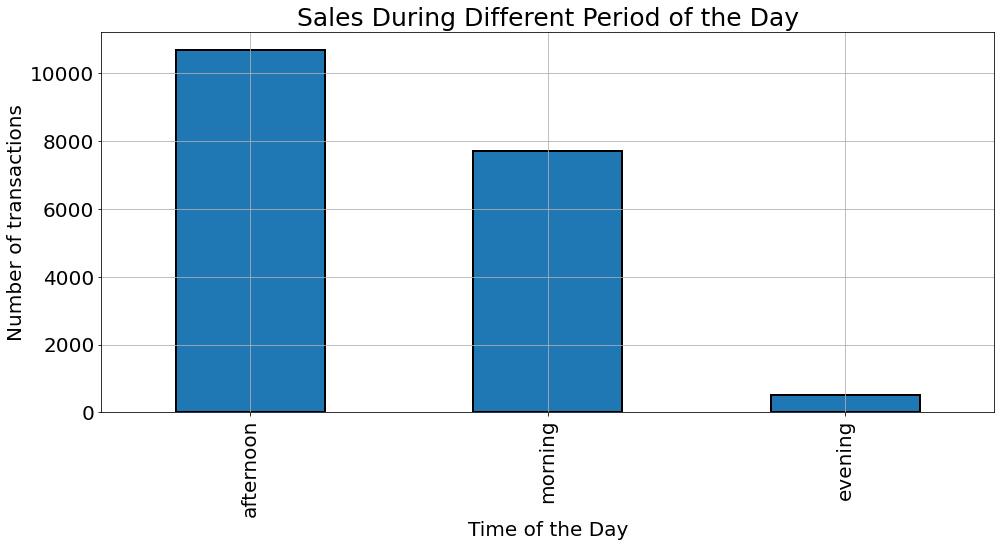

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
df1['time_of_day'].value_counts().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Time of the Day',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Sales During Different Period of the Day',fontsize=25)
plt.grid()
plt.ioff()

From this bar plot we can see that in afternoon the sales increases. So, we can apply the discount in afternoon. So, now bakery should have Enough Lunch Time Staff.

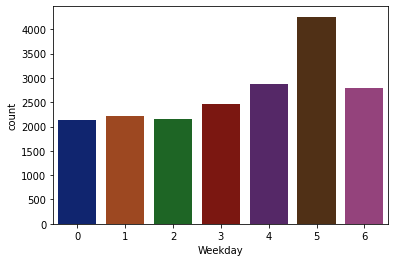

In [ ]:
sns.countplot(x='Weekday',data=df1,palette='dark')

So, from this we get to know that saturaday is a day that this bakery will have the highest sells

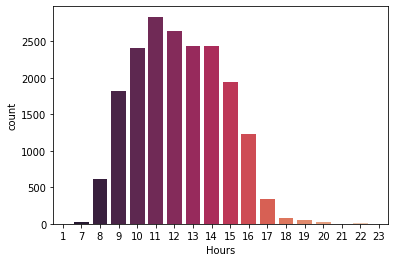

In [ ]:
sns.countplot(x='Hours',data=df1,palette='rocket')

From, this we can see that 10:00 AM to 3:00 PM is the Peek hours

In [ ]:
df1.loc[df1.Month == 10, 'Monthly'] = 'Oct'  
df1.loc[df1.Month == 11, 'Monthly'] = 'Nov' 
df1.loc[df1.Month == 12, 'Monthly'] = 'Dec' 

df1.loc[df1.Month == 1, 'Monthly'] = 'Jan' 
df1.loc[df1.Month == 2, 'Monthly'] = 'Feb' 
df1.loc[df1.Month == 3, 'Monthly'] = 'Mar' 
df1.loc[df1.Month == 4, 'Monthly'] = 'Apr' 


df1.loc[df1.Month == 9, 'Monthly'] = 'Sept' 
df1.loc[df1.Month == 8, 'Monthly'] = 'Aug' 
df1.loc[df1.Month == 7, 'Monthly'] = 'July' 
df1.loc[df1.Month == 6, 'Monthly'] = 'June' 
df1.loc[df1.Month == 5, 'Monthly'] = 'May' 



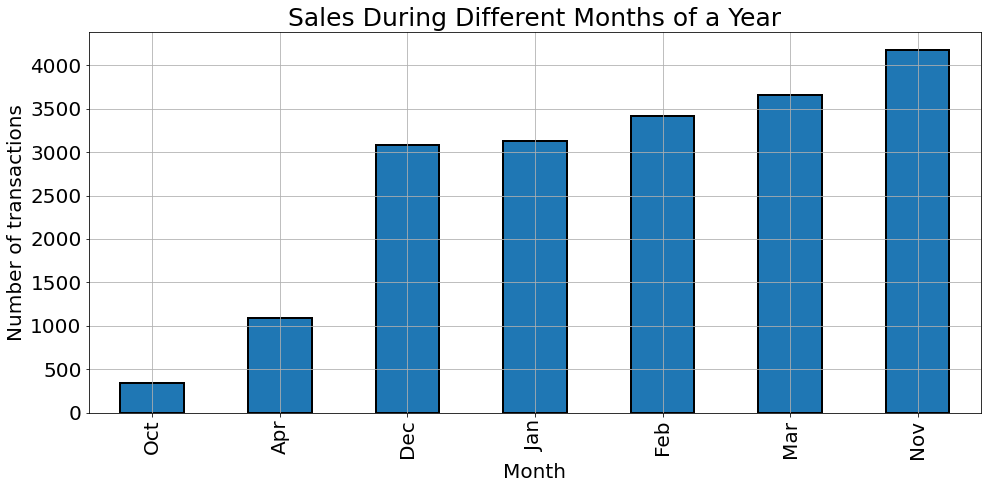

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
ax=df1.groupby('Monthly')['Item'].count().sort_values().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Sales During Different Months of a Year',fontsize=25)
plt.grid()
plt.ioff()

Maxiumum numbers of teas sold: 20
Maxiumum numbers of coffees sold: 72


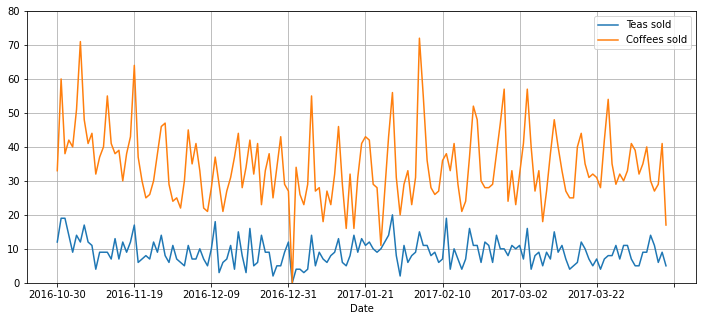

In [ ]:
#TEA OR COFFEE?

df = pd.read_csv('BreadBasket.csv')
basket=df
TC = basket.groupby("Date")["Item"].apply(lambda x: x[x=="Tea"].count()).rename("Teas sold").to_frame()
TC["Coffees sold"] = basket.groupby("Date")["Item"].apply(lambda x: x[x=="Coffee"].count())

TC.plot(figsize=(12,5))
plt.ylim([0,80])
plt.grid(True)
plt.legend()

print("Maxiumum numbers of teas sold: " + str(TC["Teas sold"].max()))
print("Maxiumum numbers of coffees sold: " + str(TC["Coffees sold"].max()))

Text(0, 0.5, 'Number of Times Coffee is Sold')

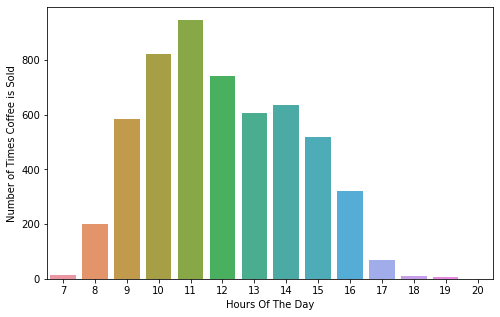

In [ ]:
#Coffee hours
cof_hours=df1[(df1['Item']== 'Coffee')]
cof_hours=cof_hours.groupby('Hours')['Item'].count()
cof_hours=cof_hours.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=cof_hours,x='Hours',y='Item')
ax.set_xlabel('Hours Of The Day')
ax.set_ylabel('Number of Times Coffee is Sold')

Now, as coffee is our highest selling item so analysis its selling hours. So, peak hour of coffee is 10:00 AM-12:00 PM. In this we can increase our sale by adding offer for less selling but expensive items in discount. 

Text(0, 0.5, 'Nombre of Times Cake is Sold')

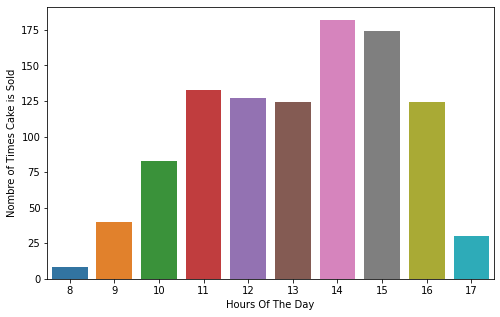

In [ ]:
#Cake hours
cake_hours=df1.loc[(df1['Item']=='Cake')]
cake_hours=cake_hours.groupby('Hours')['Item'].count()
cake_hours=cake_hours.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=cake_hours,x='Hours',y='Item')
ax.set_xlabel('Hours Of The Day')
ax.set_ylabel('Nombre of Times Cake is Sold')

Now, analysis cake sale it is highest in demand in 2:00PM -3:00 PM .As, children’s are free from there school and as you know they demand for them is highest.

Text(0, 0.5, 'Nombre of Times Tea is Sold')

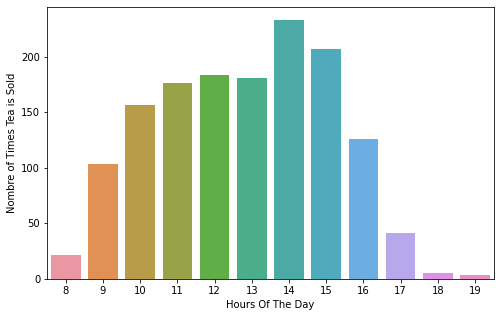

In [ ]:
#Tea hours
tea_hours=df1.loc[(df1['Item']=='Tea')]
tea_hours=tea_hours.groupby('Hours')['Item'].count()
tea_hours=tea_hours.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=tea_hours,x='Hours',y='Item')
ax.set_xlabel('Hours Of The Day')
ax.set_ylabel('Nombre of Times Tea is Sold')

Now, seeing the tea sale is highest in 2:00 PM to 3:00 PM.

**From EDA we can see that** 
1. coffee ,bread ,tea has the top sales 
2. sales for cake,sandwich ,hot chocolate increase in afternoon 
3. In afternoon our sales increases 
4. In weekend our sales increases 
5. From 10:00 AM - 3:00PM is our peak hour 
6. In winter season we have more number of transcation

**Strategies:**
1.	From my point of view this bakery should provide the different variants of coffee as it is of high sales and the area in which this bakery is situated is of coffee lover so people would buy different coffee to tasty
2.	In morning we should recommend cookies with coffee as in morning we have less cookies, toast sold so we can have some discount as cookies complement coffee and t is very light to eat in morning.
3.	We would recommend bread with that but we would not give them on discount
4.	In afternoon we should apply discount on the food items which is expensive but not sold much and which is heavy to fill the empty stomach.
5.	From 10:00 -3:00 we should have more employees as people are more so that don't have to wait as people get annoyed if they have to wait.
6.	In winter season we should promote new dishes as it will be bought as in winter, we have high sales.
7.	In weekends we can apply discount or buy one get one as there are more tourist.


### **Association  Rule Mining**

Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction.

So i will will be specifie to use version 0.17.3 as it has fuction of max_patterns and FP growth 

**The Question is to know about the purchase of which item(s) lead to purchases of what other items?**

For this Question to be solved we need to apply association rule mining and generate patterns to get the strong rule which can help is bakery Catalogue designing, Marketing, increase the sales. In this report we have compared different Mining Algorithm time take like Aprior, FP Growth. Then we have extracted the Max-patten and Close pattern and taken the time into account as see their advantage and disadvantage.


Generate strong association rules from the frequent itemsets: By definition, these rules must satisfy minimum support and minimum confidence.



* Here, we are using **Support, Confidence, Lift** to extract the interesting patterns. 
*As, always using Support and Confidence can some times misleading and we need to see the correlation sometimes. 
* Then support have should be small and confidence value should be large and  
* Lift is >= 1 then items are positively correlated. 

So, on the bases of that we are using mini_support=0.01, mini_confidence=0.5 and lift>=1.
1. Support is the probability that a transaction contains S= (X U Y).

2. Confidence: The conditional probability that a transaction containing X also contains Y  `C= sup (X U Y)/sup (X)`.

3. The rule must satisfy both Mini support and confidence to be strong .

4. The lift between the occurrence of A and B can be measured by computing lift(A, B) = P(A ∪B) P(A)P(B) .
        



In [ ]:
import mlxtend
print(mlxtend.__version__)

0.17.3


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
import time

To mine the association rule, we need to group by the data on `transaction` as there are different tuple of same transaction and then on `Items` for that transaction. Then for items which have more than one same item sold in the transaction we need to change it to 1.

In [ ]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [ ]:
hot_encoded_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So,we have contructed this function as for one transcation if the number of item bought is more then 1 then also we considered it as 1 

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

Now, we are using Aprior Algorithm to find out the frequent pattern. It is seminal algorithm proposed by R.agrwal and R.Srikant in 1994.it is an iterative approach known as level wise search and 2 step process which contains join and prune action.

In [ ]:
start_time = time.time()
end_time = time.time()
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
print('Time to find frequent itemset using Apriori')
print("--- %s seconds ---" % (end_time - start_time))

Time to find frequent itemset using Apriori
--- 2.4557113647460938e-05 seconds ---


In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


In [ ]:
r=rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
r.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [ ]:
# Rare patterns
frequent_itemsets = apriori(hot_encoded_df, min_support=0.002, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
r=rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
r.sort_values(by=['confidence'],ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
76,(extra salami or feta),(coffee),0.004015,0.478394,0.003275,0.815789,1.705267,0.001355,2.831575
89,(keeping it local),(coffee),0.006656,0.478394,0.005388,0.809524,1.692169,0.002204,2.738431
352,"(juice, spanish brunch)",(coffee),0.002747,0.478394,0.002007,0.730769,1.527547,0.000693,1.937393
113,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
276,"(medialuna, cake)",(coffee),0.003698,0.478394,0.002536,0.685714,1.433367,0.000767,1.659655
20,(art tray),(coffee),0.004015,0.478394,0.002747,0.684211,1.430224,0.000826,1.651752
285,"(cake, sandwich)",(coffee),0.006867,0.478394,0.004649,0.676923,1.414990,0.001363,1.614495
336,"(hot chocolate, pastry)",(coffee),0.005705,0.478394,0.003803,0.666667,1.393551,0.001074,1.564818
377,"(soup, sandwich)",(coffee),0.005494,0.478394,0.003592,0.653846,1.366752,0.000964,1.506862
330,"(hot chocolate, medialuna)",(coffee),0.004754,0.478394,0.003064,0.644444,1.347100,0.000789,1.467017


1. So we can see that with cake and sandwich we can also recommand coffee in afternoon as in afternoon our sales increases for cake and sandwich
2. medialuna,cake ,hot chocolate and coffee can be recommandand

In [ ]:
# Negitive Patterns
r=rules[ (rules['lift'] <1) &(rules['confidence'] >= 0.5)]
r.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


No negetive pattern

The FP-Growth Algorithm, proposed by Han, is an efficient and scalable method for mining the complete set of frequent patterns by pattern fragment growth, using an extended prefix-tree structure for storing compressed and crucial information about frequent patterns named frequent-pattern tree 

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
start_time = time.time()
frequent_itemsets_FP=fpgrowth(hot_encoded_df, min_support=0.01, use_colnames=True)
end_time = time.time()
print('Time to find frequent itemset using FP-Growth')
print("--- %s seconds ---" % (end_time - start_time))

Time to find frequent itemset using FP-Growth
--- 0.36171674728393555 seconds ---


In [ ]:
rules_FP = association_rules(frequent_itemsets_FP, metric='lift', min_threshold=1)


In [ ]:
FP=rules_FP[ (rules_FP['lift'] >= 1) & (rules_FP['confidence'] >= 0.5)]
FP.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
41,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
14,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
8,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
32,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
30,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
18,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
38,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
4,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [ ]:
from mlxtend.frequent_patterns import fpmax
start_time = time.time()

frequent_itemsets_max=fpmax(hot_encoded_df, min_support=0.01,use_colnames=True)
end_time = time.time()
print('Time to find frequent itemset using Max-Patterns')
print("--- %s seconds ---" % (end_time- start_time))

Time to find frequent itemset using Max-Patterns
--- 0.08535146713256836 seconds ---


In [ ]:

rules_max = association_rules(frequent_itemsets_FP, metric='lift', min_threshold=1)
rules_max[ (rules_max['lift'] >= 1) & (rules_max['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
4,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
8,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
14,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
18,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
30,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
32,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
36,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
38,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366


In [ ]:
frequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coffee),(hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
1,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
2,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
3,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
4,(coffee),(cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
5,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
6,(coffee),(muffin),0.478394,0.038457,0.018806,0.039311,1.022193,0.000408,1.000888
7,(muffin),(coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777
8,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
9,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


In [ ]:

##Close pattern Mining using FP growth
frequent=fpgrowth(hot_encoded_df, min_support=0.001, use_colnames=True)
su = frequent.support.unique()#all unique support count

#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset


    
#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print('Time to find Close frequent itemset')
print("--- %s seconds ---" % (time.time() - start_time)) 

Time to find Close frequent itemset
--- 0.05121135711669922 seconds ---


In [ ]:
cl

[frozenset({'bread'}),
 frozenset({'scandinavian'}),
 frozenset({'hot chocolate'}),
 frozenset({'cookies'}),
 frozenset({'jam'}),
 frozenset({'muffin'}),
 frozenset({'coffee'}),
 frozenset({'pastry'}),
 frozenset({'medialuna'}),
 frozenset({'tea'}),
 frozenset({'tartine'}),
 frozenset({'mineral water'}),
 frozenset({'farm house'}),
 frozenset({'fudge'}),
 frozenset({'juice'}),
 frozenset({"ella's kitchen pouches"}),
 frozenset({'hearty & seasonal'}),
 frozenset({'frittata'}),
 frozenset({'soup'}),
 frozenset({'smoothies'}),
 frozenset({'pick and mix bowls'}),
 frozenset({'cake'}),
 frozenset({'mighty protein'}),
 frozenset({'coke'}),
 frozenset({'my-5 fruit shoot'}),
 frozenset({'focaccia'}),
 frozenset({'sandwich'}),
 frozenset({'alfajores'}),
 frozenset({'eggs'}),
 frozenset({'brownie'}),
 frozenset({'dulce de leche'}),
 frozenset({'granola'}),
 frozenset({'keeping it local'}),
 frozenset({'art tray'}),
 frozenset({'truffles'}),
 frozenset({'kids biscuit'}),
 frozenset({'jammie dodge

In [ ]:
def all_con(rule):
  s=list()
  for i in range(len(rule)):
    sup_A=rule.iloc[i]['antecedent support'] sup(x)
    sup_B=rule.iloc[i]['consequent support'] sup(y)
    supA_B=rule.iloc[i]['support'] sup(xu y)
    s.append(supA_B/max(sup_A,sup_B))
  return s


In [ ]:
s=all_con(rules_max)

In [ ]:
s

[0.1881625441696113,
 0.1881625441696113,
 0.061837455830388695,
 0.061837455830388695,
 0.04100742654181466,
 0.04100742654181466,
 0.1098677517802645,
 0.1098677517802645,
 0.05896643109540636,
 0.05896643109540636,
 0.0442363577655796,
 0.0442363577655796,
 0.03931095406360424,
 0.03931095406360424,
 0.09938162544169611,
 0.09938162544169611,
 0.08911850177591218,
 0.08911850177591218,
 0.12441314553990611,
 0.023409893992932862,
 0.034226670971908305,
 0.034226670971908305,
 0.023409893992932862,
 0.12441314553990611,
 0.07354240282685512,
 0.07354240282685512,
 0.051662899580238945,
 0.051662899580238945,
 0.10424028268551237,
 0.10424028268551237,
 0.08588957055214724,
 0.08588957055214724,
 0.04306537102473498,
 0.04306537102473498,
 0.03312720848056537,
 0.03312720848056537,
 0.11439929328621908,
 0.11439929328621908,
 0.16666666666666669,
 0.16666666666666669,
 0.07135938004520505,
 0.07135938004520505,
 0.07037037037037037,
 0.09664292980671414,
 0.020980565371024735,
 0.0209

# **Forcasting**

In [ ]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours','Item']]

In [ ]:
dfs = df.groupby(['Date', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Date')

In [ ]:
dfs.iloc[1]

Item
adjustment                  0.0
afternoon with the baker    0.0
alfajores                   0.0
argentina night             0.0
art tray                    0.0
                           ... 
tshirt                      0.0
valentine's card            0.0
vegan feast                 0.0
vegan mincepie              0.0
victorian sponge            0.0
Name: 2016-10-31, Length: 94, dtype: float64

In [ ]:
l=list()
for i in range(len(dfs)):
  l.append(sum(dfs.iloc[i]))

In [ ]:
dfs['transcation']=l

In [ ]:
dfs.to_csv('data.csv')

Downloading the CSV file and then used Tableau for Forcasting

In [ ]:
from IPython.display import IFrame
IFrame('https://public.tableau.com/views/forcast_16017292572350/Sheet1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link:showVizHome=no&:embed=true', width=1000, height=925)

: As it is time-series dataset we can apply forecasting as see the future sells .On this dataset we can’t apply clustering, classification or regression it is only suited for forecasting .So I have used Tableau and connect with python notebook to perform the forecasting as it has the option of forecasting.
1.	I first grouped by data on date and items and then save it in the csv file and used that file to forecast the future.
2.	So on the basis of date i.e. abstraction level of date I have forcasted the data and found out that from 9 April 2017 to 12 April 2017 our transcation will go down and then from 13 April it will starting to increase and sales became moderate on 15th April 2017.


# Thank You
# Made By Anshu Pandey 
# 18csu026

# **RULES**
1. From my point of view this bakery should provide the different variants of coffee as it is of high sales and the area in which this bakery is situated is of coffee lover so people would buy different coffee to tasty
2. In morning we should recommend cookies with coffee as in morning we have less cookies, toast sold so we can have some discount as cookies complement coffee and it is very light to eat in morning.
3. We would recommend bread with that but we would not give them on discount
4. In afternoon we should apply discount on the food items which is expensive but not sold much and which is heavy to fill the empty stomach.
5. From 10:00 -3:00 we should have more employees as people are more so that don't have to wait as people get annoyed if they have to wait.
6. In winter season we should promote new dishes as it will be bought as in winter, we have high sales.
7. In weekends we can apply discount or buy one get one as there are more tourist.


8. So we can see that with cake and sandwich we can also recommand coffee in afternoon as in afternoon our sales increases for cake and sandwich
medialuna,cake ,hot chocolate and coffee can be recommandand
**Rule I have chosen to show my client: **
1.	Spanish Brunch  Coffee [support :0.01,confidence: 0.59,lift:1.25]
2.	Pastry   Coffee [support :0.04,confidence: 0.55,lift:1.15]
3.	Juice  Coffee [support :0.02,confidence: 0.53,lift:1.11]
4.	Hot chocolate  Coffee [support :0.02,confidence: 0.50,lift:1.06]
**Reason is:**
1.	First, these have high confidence and lift i.e. there are highly correlated 
2.	Secondly, all the rules how pass the interestingness round as not interesting. The interestingness of the rule is subjective so I would not suggest to promote toast, sandwiches, cookies with coffee because it is very common that person who takes coffee will likely to take these items but it is interesting that juice and coffee goes together , Spanish Brunch and coffee goes together it is interesting to know.


